### Projeto 1:
*“Churn” de clientes em uma empresa de telecomunicações*

Muitos clientes migram entre operadoras de telecomunicações devido a fatores diversos, sendo
essa prática é conhecida como “Churn”. Com uma análise do banco de dados dos clientes é
possível desenvolver um modelo de aprendizagem de máquina que seja capaz de prever os
clientes que são mais propensos a migrar de operadora e assim oferece-los promoções
diferenciadas visando retê-los.
Uma empresa de telecomunicações está preocupada com o número de clientes que trocam seus
negócios de telefonia fixa por concorrentes a cabo. Eles precisam entender quem está saindo.
Imagine que você é um analista dessa empresa e precisa descobrir quem está saindo e por quê.



O que o Dataset nos informa:
   - Clientes que saíram no último mês - a coluna é chamada Churn, esse é o valor a ser previsto no modelo
   - Serviços para os quais cada cliente se inscreveu: telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivo, suporte técnico, streaming de TV e filmes.
   - Informações da conta do cliente: Informações da conta do cliente: há quanto tempo eles são clientes (tenure), contrato, forma de pagamento, faturamento sem papel, cobranças mensais e cobranças totais.
   - Informações demográficas sobre clientes: sexo, faixa etária e se têm parceiros e dependentes.


O que você deve fazer:
   - Estudar cada feature para a melhor compreensão dos resultados
   - Faça uma análise exploratória dos dados
   - Caso exista, substituir cada item faltantes por um valor apropriado
   - Fazer o particionamento dos dados em treinamento (80%) e teste (20%)
   - Substituir os dados categóricos em texto para numéricos
   - Treinar e validar uma árvore de decisão e avaliar a precisão do modelo
   - Mostrar a matriz de confusão para o modelo


Instruções:
   - Faça o trabalho em 5 grupos
   - O prazo para a entrega do trabalho é 27/09/2022 através de uma tarefa disponibilizada no Microsoft Teams
   - As equipes deverão apresentar o trabalho na data da entrega, sendo que a apresentação do trabalho contará como nota individual

In [128]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [129]:
from sklearn.preprocessing import LabelEncoder

target = df.Churn
features = df.drop(['Churn', 'customerID'], axis=1)

# Verificando se existem valores nulos
features.isna().sum().sum(), target.isna().sum()

(0, 0)

In [130]:
# Normalizando os dados numéricos
from sklearn.preprocessing import MinMaxScaler

numeric_features = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Removendo a coluna SeniorCitizen
numeric_features.pop(0)

for feature_to_scale in numeric_features:
    scaler = MinMaxScaler()
    features[feature_to_scale] = scaler.fit_transform(features[[feature_to_scale]])

In [131]:
# Codificação das features categóricas
categorial_features = features.select_dtypes(include=['object']).columns

for feature_to_encode in categorial_features:
    encoder = LabelEncoder()
    features[feature_to_encode] = encoder.fit_transform(features[feature_to_encode])

features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,2505
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,1466
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,157
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,1400
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,925


<AxesSubplot:>

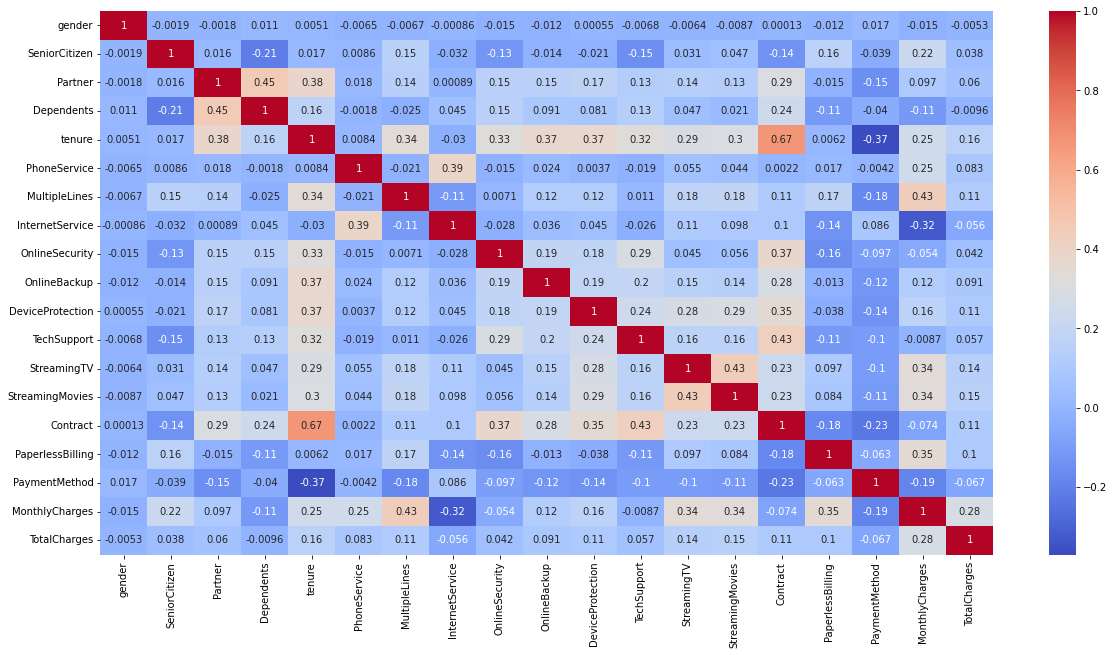

In [132]:
# Realizando a análise exploratória dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Verificando a correlação entre as features
plt.figure(figsize=(20, 10))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm')

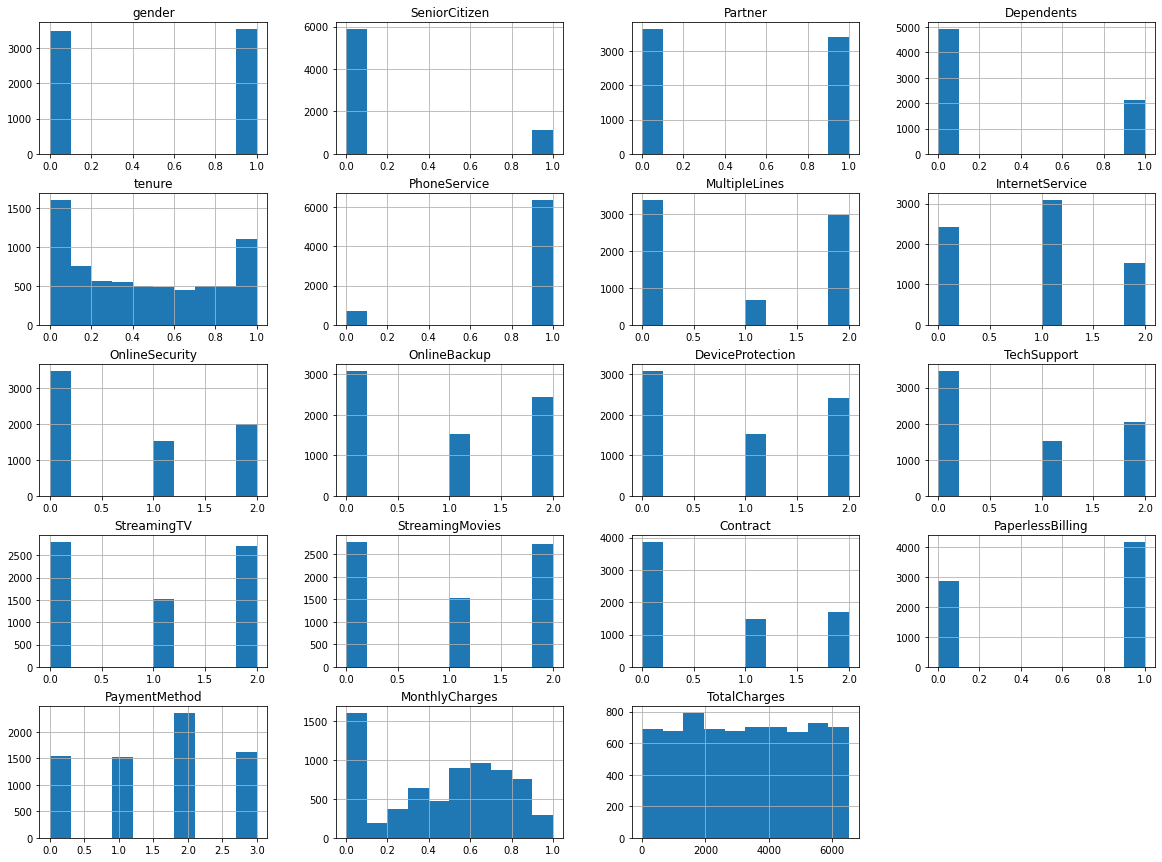

In [133]:
# Verificando a distribuição das features
features.hist(figsize=(20, 15));

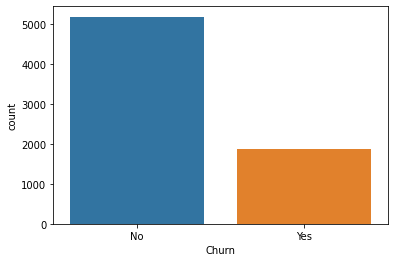

In [134]:
# Verificando a distribuição da variável target
sns.countplot(target);

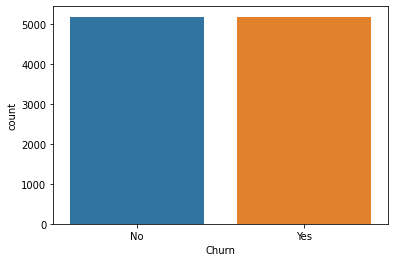

In [157]:
# Realizando o oversampling para balancear os dados
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
features_res, target_res = ros.fit_resample(features, target)

sns.countplot(target_res);

## Comparando modelos

In [155]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Dividindo os dados em treinamento e teste
features_train, features_test, target_train, target_test = train_test_split(features_res, target_res, test_size=0.2, random_state=0)


# Avaliando o modelo
def evaluate_classifier(model, features, target, pos_label="Yes"):
    predictions = model.predict(features)
    accuracy = model.score(features, target)
    precision = precision_score(target, predictions, pos_label=pos_label)
    recall = recall_score(target, predictions, pos_label=pos_label)
    f1 = f1_score(target, predictions, pos_label=pos_label)
    conf_matrix = confusion_matrix(target, predictions)
    ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_).plot(cmap='Blues')
    print(f'Accuracy: {accuracy:.4}\nPrecision: {precision:.4}\nRecall: {recall:.4}\nF1: {f1:.4}')

Accuracy: 0.6511
Precision: 0.6499
Recall: 0.6551
F1: 0.6525


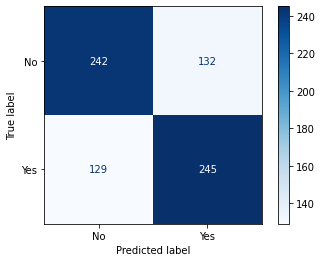

In [156]:
# Criando o modelo base de árvore de decisão
tree_model = DecisionTreeClassifier()
tree_model.fit(features_train, target_train)

evaluate_classifier(tree_model, features_test, target_test)

In [153]:
# Definindo os parâmetros para o modelo de árvore de decisão
from sklearn.model_selection import GridSearchCV

tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [None, 2, 5, 10, 30, 80],
    'max_depth': [None, 2, 5, 10, 30, 80]
}
tree_model_cv = DecisionTreeClassifier()
tree_grid = GridSearchCV(tree_model_cv, tree_params, cv=5, n_jobs=-1, verbose=1)
tree_grid.fit(features_train, target_train)

print(f'Best score: {tree_grid.best_score_:.4}')
tree_grid.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best score: 0.8467


{'criterion': 'entropy', 'max_depth': 30, 'max_leaf_nodes': None}